# Grid points

Here we show what kind of grids are used for the different quadratures. 

Further more, there are two options, how many points are used for the probabilistic quadratures. (one or three points)

These options are compared afterwards.

In [6]:
import matplotlib.pyplot as plt
import os 
os.chdir("..")
from Methodes.Smolyak_one import *

## One point for q = 1

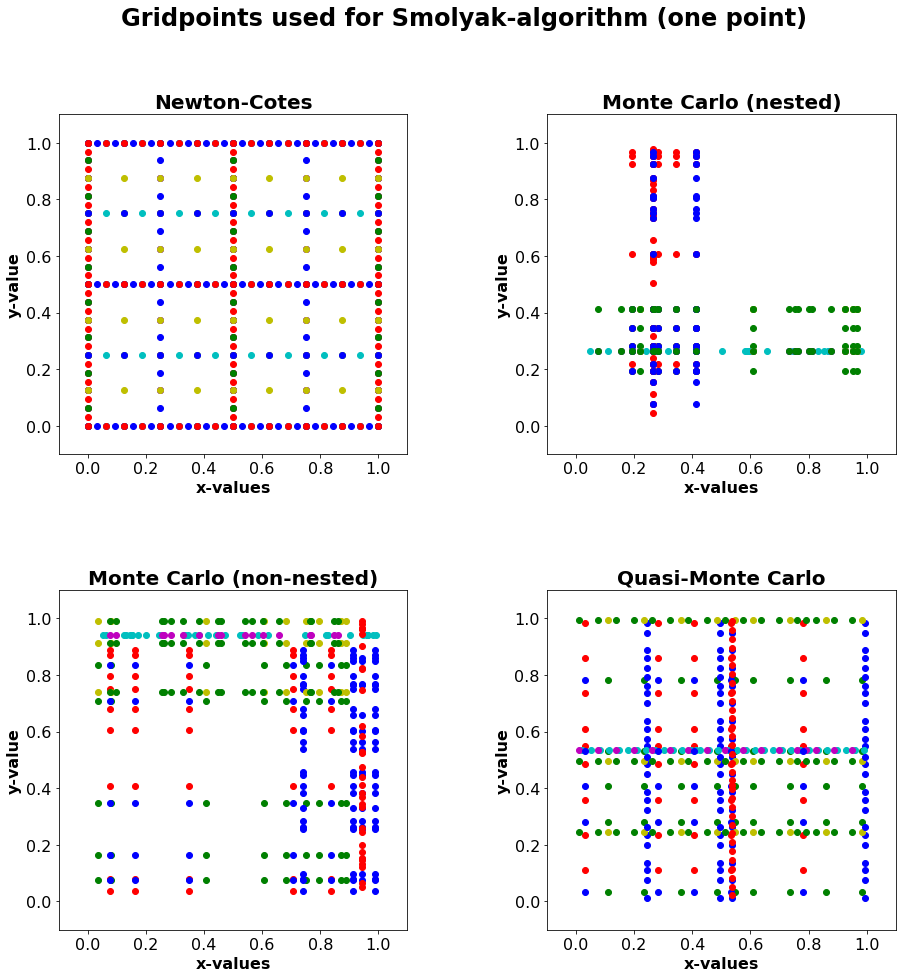

In [7]:
def grid_points(quadrature: str, q: int, a=0,b=1):
    list_of_points = []
    dim = 2

    # Because the points used for the deterministic quadratures are not changed, it is faster to call them
    # at the beginning before starting the Smolyak alg.
    if "Carlo" in quadrature:
        q = q + 1

    # For every one dimensional degree of approx.  a weights and points vector
    for i in range(1, (q - dim + 2)):
        
        # One option for Newton-Cotes and Trapezoidal quadrature, because 
        if quadrature == "Newton-Cotes" or quadrature == "Trapezoidal":
            points, weights =one_dim_trapezoidal(i, a, b)
            
        if quadrature ==  "Monte Carlo (nested)" and i >1:
            points, weights = monte_carlo_quad(i-1, a, b)
            points = np.concatenate([list_of_points[-1], points])


        if quadrature ==  "Monte Carlo (non-nested)"or (quadrature == "Monte Carlo (nested)" and i == 1)  :
            points, weights = monte_carlo_quad(i, a, b)
            
        if quadrature ==  "Quasi-Monte Carlo":
            points, weights = qmc_quad(i, a, b)
            
        list_of_points.append(points)
        
    # Now we get the combinations of one-dimensional degrees of approx. in Q(q,d)        
    rng = list(range(q)) * dim
    rng = [x + 1 for x in rng]

    possible_combinations = list(set(i for i in itt.permutations(rng, dim) if (q - dim) < sum(i) < q + 1))
    number_approx = len(possible_combinations)
    meshgrid_list_x = []
    meshgrid_list_y = []
    for i in range(number_approx):

        # gridpoints and the weight vectors are put into separate lists to make it easier to
        # make a meshgrid
        current_tuple = possible_combinations[i]
        current_points = []

        for j in range(len(current_tuple)):
            current_points.append(list_of_points[current_tuple[j] - 1])

        # meshgrid yields a np.array with all coordinates needed for alg
        # coordinate and respective weight could be found in the same places in the array
        meshgrid_points = np.array(np.meshgrid(*current_points))
        meshgrid_list_x.append(meshgrid_points[0])
        meshgrid_list_y.append(meshgrid_points[1])
        
    return [meshgrid_list_x, meshgrid_list_y] 

def make_plot_of_grids():
    option_list = ["Newton-Cotes",
               "Monte Carlo (nested)",
               "Monte Carlo (non-nested)",
               "Quasi-Monte Carlo"]
    fig = plt.figure(figsize=(15,15))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(len(option_list)):
        grid_list_x, grid_list_y = grid_points(option_list[i], 6)
        plt.subplot(2,2,i+1)
        modified_scatter_plot(grid_list_x,grid_list_y,title=option_list[i], input_list=True)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    
        
    fig.suptitle("Gridpoints used for Smolyak-algorithm (one point)", fontsize=24,fontweight="bold")
    plt.show()

make_plot_of_grids()

#### Here the grid points used for the approximation of the integral of a 2 dimensional function with the level of approximation q = 6 is shown, if one point is used for the one is used for probabilistic quadratures and q = 1. Apart form the upper left  grid, the other grids change a little every time they are generated.  

## Three points for q = 1

In [8]:
from Methodes.Smolyak_three import *

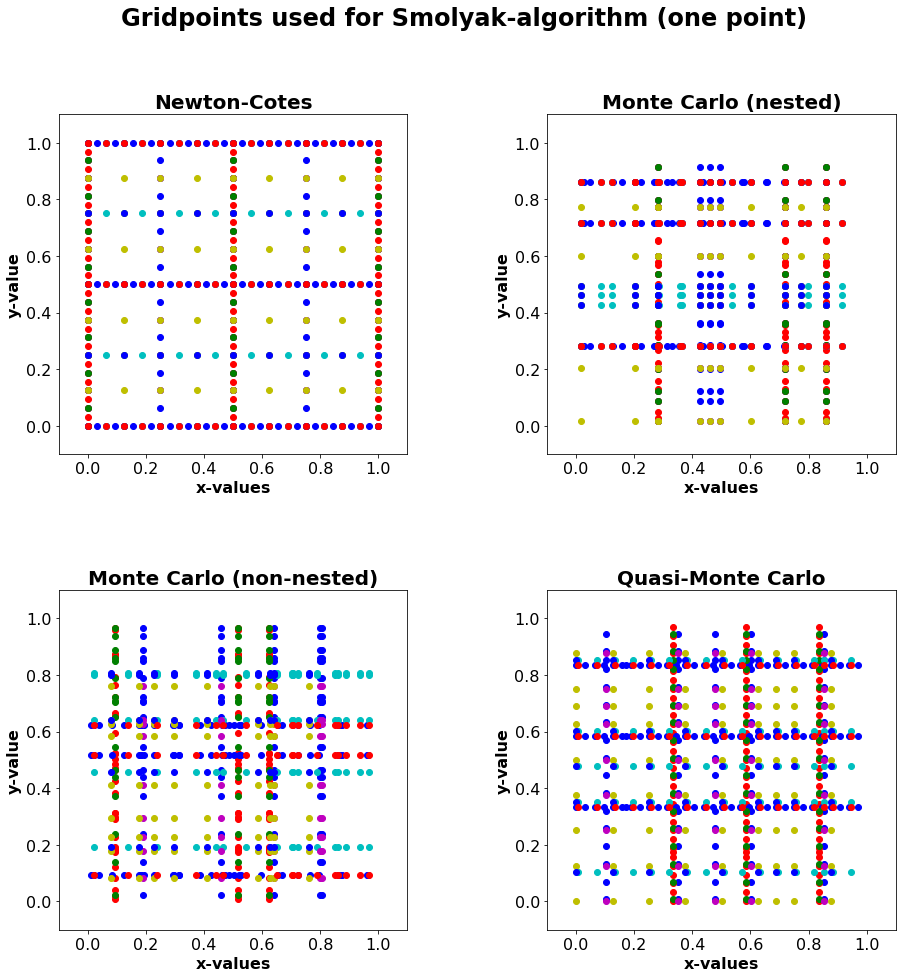

In [9]:
def grid_points(quadrature: str, q: int, a=0,b=1):
    list_of_points = []
    dim = 2
    # Now for the  probabilistic quadratures, only one point is used for the first one-dimensional 
    # degree of approximation. For this we add one to q, because otherwise the number of points for 
    # the probabilistic quadratures would be much  smaller. 
   
    
    # Now we apply the quadrature chosen by user
    # !! If quadratures is changed or extended in interface, please options here !!

    # Because the points used for the deterministic quadratures are not changed, it is faster to call them
    # at the beginning before starting the Smolyak alg.


    # For every one dimensional degree of approx.  a weights and points vector
    for i in range(1, (q - dim + 2)):
        
        # One option for Newton-Cotes and Trapezodial quadrature, because 
        if quadrature == "Newton-Cotes" or quadrature == "Trapezoidal":
            points, weights =one_dim_trapezoidal(i, a, b)
            
        if quadrature ==  "Monte Carlo (nested)" and i >1:
            points, weights = monte_carlo_quad(i-1, a, b)
            points = np.concatenate([list_of_points[-1], points])


        if quadrature ==  "Monte Carlo (non-nested)"or (quadrature == "Monte Carlo (nested)" and i == 1)  :
            points, weights = monte_carlo_quad(i, a, b)
            
        if quadrature ==  "Quasi-Monte Carlo":
            points, weights = qmc_quad(i, a, b)
            
        list_of_points.append(points)
        
    # Now we get the combinations of one-dimensional degrees of approx. in Q(q,d)        
    rng = list(range(q)) * dim
    rng = [x + 1 for x in rng]

    possible_combinations = list(set(i for i in itt.permutations(rng, dim) if (q - dim) < sum(i) < q + 1))
    number_approx = len(possible_combinations)
    meshgrid_list_x = []
    meshgrid_list_y = []
    for i in range(number_approx):

        # the next two steps could be combined in one line.
        # what is done is, that first the tuple at position i is taken from the list of the set I.
        # Then the regarding vectors are taken from the list with the weight and points vectors and
        # are combined to a d dimensional point set

        # gridpoints and the weight vectors are put into separate lists to make it easier to
        # make a meshgrid
        current_tuple = possible_combinations[i]
        current_points = []

        for j in range(len(current_tuple)):
            current_points.append(list_of_points[current_tuple[j] - 1])

        # meshgrid yields a np.array with all coordinates needed for alg
        # coordinate and respective weight could be found in the same places in the array
        meshgrid_points = np.array(np.meshgrid(*current_points))
        meshgrid_list_x.append(meshgrid_points[0])
        meshgrid_list_y.append(meshgrid_points[1])
        
    return [meshgrid_list_x, meshgrid_list_y] 

def make_plot_of_grids():
    option_list = ["Newton-Cotes",
               "Monte Carlo (nested)",
               "Monte Carlo (non-nested)",
               "Quasi-Monte Carlo"]
    fig = plt.figure(figsize=(15,15))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(len(option_list)):
        grid_list_x, grid_list_y = grid_points(option_list[i], 6)
        plt.subplot(2,2,i+1)
        modified_scatter_plot(grid_list_x,grid_list_y,title=option_list[i], input_list=True)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    
        
    fig.suptitle("Gridpoints used for Smolyak-algorithm (one point)", fontsize=24,fontweight="bold")
    plt.show()

make_plot_of_grids()

Here the grid points used for the approximation of the integral of a 2 dimensional function with the level of approximation q = 6 is shown, if one point is used for the one is used for probabilistic quadratures and q = 1. Apart form the upper left  grid, the other grids change a little every time they are generated.  